# Titanic LL solution

#### Attempt the solution of Titanic Data from https://www.kaggle.com/c/titanic using Logistic Regression, Regression Tree and SVM.

## Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the data

In [2]:
tt_train = pd.read_csv('train.csv')
tt_test = pd.read_csv('test.csv')

In [3]:
# tt = tt_train.append(tt_test, ignore_index=True)
tt = pd.concat([tt_train,tt_test])
tt = tt.set_index('PassengerId')

C:\Users\liuxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [38]:
tt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
tt.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [ ]:
tt_train.describe()

In [20]:
#tt_train.info()
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=tt_train)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=tt_train)

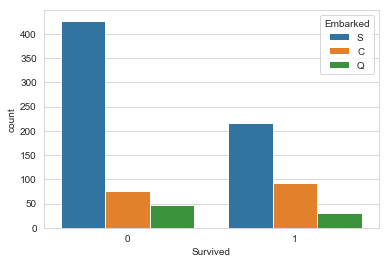

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=tt_train)

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=tt_train,)
plt.legend(loc='upper right')

(array([20., 15.,  5.,  4., 13., 43., 19., 28., 39., 36., 24., 17., 26.,
        10., 11., 11.,  7.,  3.,  5.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

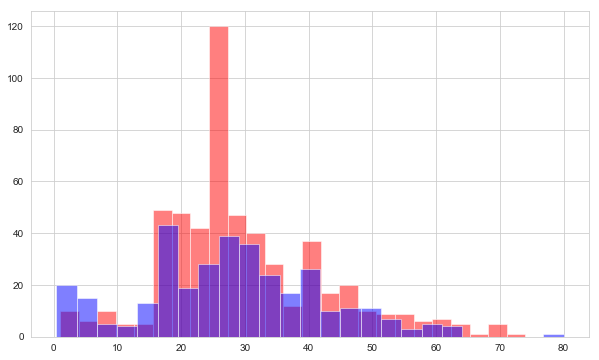

In [93]:
plt.figure(figsize=(10,6))
#sns.distplot(tt_train['Age'].dropna(),hue='Survived',kde=False,color='blue',bins=30)
plt.hist(tt_train['Age'][tt_train['Survived']==0],bins=25, alpha=0.5, label='non-survived', color='red')
plt.hist(tt_train['Age'][tt_train['Survived']==1],bins=25, alpha=0.5, label='survived', color='blue')

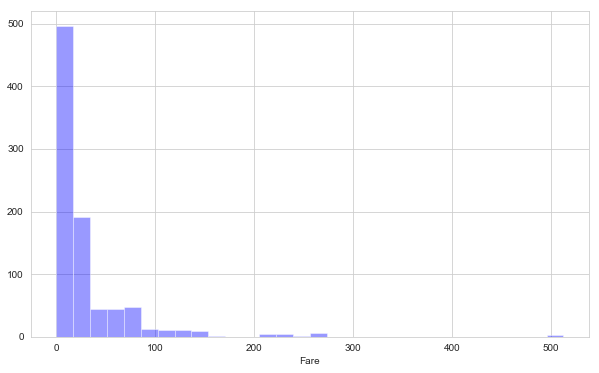

In [34]:
plt.figure(figsize=(10,6))
sns.pairplot(tt_train['Fare'].dropna(),kde=False,color='blue',bins=30)

In [35]:
tt_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Check Missing data

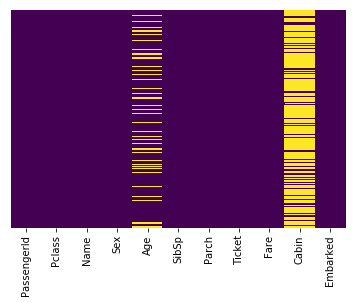

In [6]:
#sns.heatmap(tt_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(tt_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

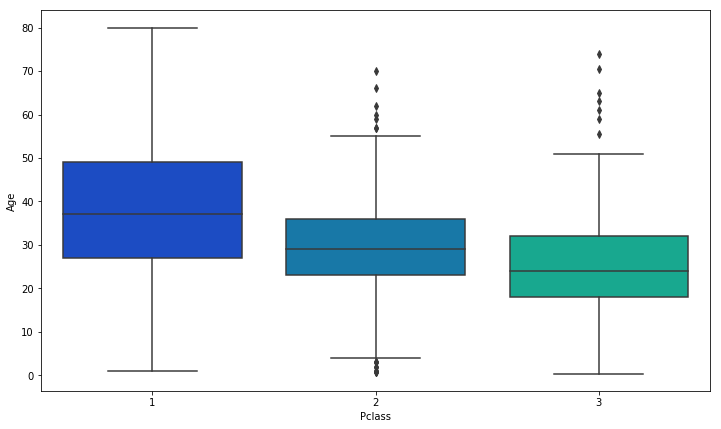

In [23]:
# Check Age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=tt_train,palette='winter')

In [221]:
# Check Cabin
#cabin_index = tt_train['Cabin'].astype(str).str[0]
cabin_index = tt_train['Cabin'].astype(str).str[0]

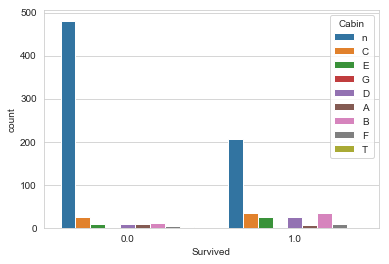

In [223]:
sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue=cabin_index,data=tt_train)
sns.countplot(x='Survived',hue=cabin_index,data=tt)

In [222]:
#tt_train.groupby(cabin_index).mean()
tt.groupby(cabin_index).mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Cabin,,,,,,,
A,44.833333,39.623887,0.133333,439.600000,1.000000,0.133333,0.466667
B,34.955556,113.505764,0.574468,521.808511,1.000000,0.361702,0.744681
C,36.086667,100.151341,0.474576,406.440678,1.000000,0.644068,0.593220
D,39.032258,57.244576,0.303030,475.939394,1.121212,0.424242,0.757576
E,38.116667,46.026694,0.312500,502.437500,1.312500,0.312500,0.750000
F,19.954545,18.696792,0.538462,370.384615,2.384615,0.538462,0.615385
G,14.750000,13.581250,1.250000,216.000000,3.000000,0.500000,0.500000
T,45.000000,35.500000,0.000000,340.000000,1.000000,0.000000,0.000000
n,27.555293,19.157325,0.365357,443.208151,2.639010,0.547307,0.299854


## Extract Title from Name

In [7]:
# tt_train['Title'] = tt_train['Name'].str.split(',').apply(lambda x: x[1])
# title = tt_train['Name'].str.split(',').apply(lambda x: x[1])
title = tt['Name'].str.split(',').apply(lambda x: x[1])

In [8]:
title = title.str.split('.').apply(lambda x: x[0])

In [9]:
title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Ms                2
 Mlle              2
 Don               1
 Jonkheer          1
 Sir               1
 Lady              1
 Capt              1
 Mme               1
 Dona              1
 the Countess      1
Name: Name, dtype: int64

In [12]:
title_cat = {
    ' Mr': 'Mr',
    ' Miss': 'Miss',
    ' Mrs': 'Mrs',
    ' Ms': 'Miss',
    ' Master': 'Master',
    ' Dr': 'Officer',
    ' Rev': 'Officer',
    ' Col': 'Officer',
    ' Major': 'Officer',
    ' Mlle': 'Miss',
    ' Don': 'Noble',
    ' Dona':'Noble',
    ' Sir': 'Noble',
    ' the Countess': 'Noble',
    ' Mme': 'Mrs',
     ' Capt': 'Officer',
     ' Jonkheer': 'Noble',
     ' Lady': 'Noble'
       }

In [13]:
title_update = title.map(title_cat)

In [14]:
title_update.isna().sum()

0

In [250]:
tt[title_update.isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


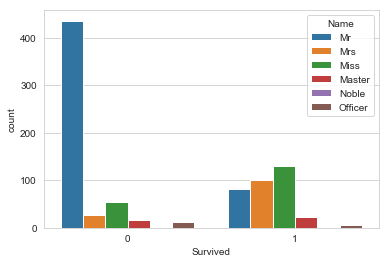

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue=title_update,data=tt_train)

In [80]:
title_update.value_counts()

1309

## Age Imputation

In [254]:
# tt_train['Age'].groupby(tt_train['Pclass']).median()
tt['Age'].groupby(tt['Pclass']).median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [13]:
tt_train['Age'].groupby(tt_train['Pclass']).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
tt_test['Age'].groupby(tt_test['Pclass']).mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [15]:
#tt_train['Age'].groupby([tt_train['Sex'],tt_train['Pclass'],title_update]).median()
tt['Age'].groupby([tt['Sex'],tt['Pclass'],title_update]).median()

Sex     Pclass  Name   
female  1       Miss       30.0
                Mrs        45.0
                Noble      39.0
                Officer    49.0
        2       Miss       20.0
                Mrs        30.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Noble      40.0
                Officer    52.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [60]:
# Imputation Age by Pclass
# def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):

#         if Pclass == 1:
#             return tt_train['Age'][tt_train['Pclass']==1].mean()

#         elif Pclass == 2:
#             return tt_train['Age'][tt_train['Pclass']==2].mean()

#         else:
#             return tt_train['Age'][tt_train['Pclass']==3].mean()

#     else:
#         return Age

In [11]:
# Imputate Age
#tt_train['Age'] = tt_train[['Age','Pclass']].apply(impute_age,axis=1)

In [252]:
# Imputation by pclass
# pclass_group = tt_train.groupby('Pclass')
pclass_group = tt.groupby('Pclass')

In [253]:
pclass_group.Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [255]:
# tt_train['Age'] = pclass_group.Age.apply(lambda x: x.fillna(x.median()))
tt['Age'] = pclass_group.Age.apply(lambda x: x.fillna(x.median()))

In [16]:
#Imputation by sex,pclass and title
# age_group = tt_train.groupby(['Sex','Pclass', title_update]) 
age_group = tt.groupby(['Sex','Pclass', title_update]) 

In [17]:
# tt_train['Age'] = age_group.Age.apply(lambda x: x.fillna(x.median()))
tt['Age'] = age_group.Age.apply(lambda x: x.fillna(x.median()))

In [18]:
# tt_train.Age.isna().sum()
tt['Age'].isna().sum()

0

In [19]:
tt[tt['Age'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


## Cabin Imputation

In [20]:
# Imputate Carbin, grab first letter
# cabin_index = tt_train.Cabin.astype(str).str[0]
cabin_index = tt.Cabin.astype(str).str[0]

In [21]:
cabin_index.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

## Fare Imputation

In [22]:
 # Impute with the median Fare for the same Pclass
tt['Fare'][tt['Fare'].isna()] = tt['Fare'][tt['Pclass']==3].median()

C:\Users\liuxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
tt[tt['Fare'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


## Embarked imputation by adjacent ticket number

In [24]:
tt['Embarked'][tt['Embarked'].isna()] = 'S'

C:\Users\liuxi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Create dummies for categorical variables

    1. Sex: convert to male, female, create dummy
    2. Children: Age < 16
    2. Family size: create category according to Sibsip and Parch
    3. Pclass: create dummy
    4. Embark: create dummy
    5. Cabin index: create dummy

In [25]:
#Sex dummy
# sex = pd.get_dummies(tt_train['Sex'],drop_first=True)
sex = pd.get_dummies(tt['Sex'],drop_first=True)

In [26]:
sex.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [27]:
# Children dummy
# child = pd.get_dummies(tt_train['Age'] < 16,prefix='child',drop_first=True)
child = pd.get_dummies(tt['Age'] < 16,prefix='child',drop_first=True)

In [28]:
child.head()

,child_True
PassengerId,
1,0
2,0
3,0
4,0
5,0


In [68]:
# Combine Child and Sex variable
sex['male'][child['child_True']==1]= 0

In [34]:
# Family size
# familysize = 1 + tt_train['Parch'] + tt_train['SibSp']

tt['familysize'] = 1 + tt['Parch'] + tt['SibSp']

In [37]:
tt['familysize'].head()

PassengerId
1    2
2    2
3    1
4    2
5    1
Name: familysize, dtype: int64

In [38]:
# Pclass dummy
# pclass = pd.get_dummies(tt_train['Pclass'],prefix='pclass',drop_first=True)
pclass = pd.get_dummies(tt['Pclass'],prefix='pclass',drop_first=True)

In [39]:
pclass.head()

,pclass_2,pclass_3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1


In [40]:
# Embark dummy
# embark = pd.get_dummies(tt_train['Embarked'],prefix='embark',drop_first=True)
embark = pd.get_dummies(tt['Embarked'],prefix='embark',drop_first=True)

In [41]:
# Cabin index dummy
cabin = pd.get_dummies(cabin_index,prefix='cabin',drop_first=True)

In [42]:
cabin.head()

,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_n
PassengerId,,,,,,,,
1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1


### Produce the analytic data

In [43]:
tt.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,familysize
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,2
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,2
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,1
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,2
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,1


In [51]:
# tt_train = pd.concat([tt_train['Survived'],tt_train['Age'],tt_train['Fare'],sex,child,familysize,pclass,embark,cabin],axis=1)
tt = pd.concat([tt['Survived'],tt['Age'],tt['Fare'],sex,child,tt['familysize'],
                tt['Parch'],tt['SibSp'],pclass,embark,cabin],axis=1)


In [84]:
tt['male']=sex['male'].values

In [85]:
pd.crosstab(tt['male'],tt['child_True'])

child_True,0,1
male,,
0,410,123
1,776,0


In [163]:
#tt_train.to_csv('tt_train.csv') 
#tt_train_2 = pd.read_csv('tt_train.csv')

In [15]:
#tt_train = pd.concat([tt_train,title_dummy],axis=1)

In [291]:
from sklearn.model_selection import train_test_split

In [52]:
X = tt_train.drop('Survived',axis=1)
y = tt_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [89]:
X_train = tt[tt['Survived'].notnull()].drop('Survived',axis=1)
y_train = tt[tt['Survived'].notnull()]['Survived']
X_test = tt[tt['Survived'].isna()].drop('Survived',axis=1)
y_test = tt[tt['Survived'].isna()]['Survived']

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 19 columns):
Age           891 non-null float64
Fare          891 non-null float64
male          891 non-null uint8
child_True    891 non-null uint8
familysize    891 non-null int64
pclass_2      891 non-null uint8
pclass_3      891 non-null uint8
embark_Q      891 non-null uint8
embark_S      891 non-null uint8
cabin_B       891 non-null uint8
cabin_C       891 non-null uint8
cabin_D       891 non-null uint8
cabin_E       891 non-null uint8
cabin_F       891 non-null uint8
cabin_G       891 non-null uint8
cabin_T       891 non-null uint8
cabin_n       891 non-null uint8
Parch         891 non-null int64
SibSp         891 non-null int64
dtypes: float64(2), int64(3), uint8(14)
memory usage: 53.9 KB


In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
Age           418 non-null float64
Fare          418 non-null float64
male          418 non-null uint8
child_True    418 non-null uint8
familysize    418 non-null int64
pclass_2      418 non-null uint8
pclass_3      418 non-null uint8
embark_Q      418 non-null uint8
embark_S      418 non-null uint8
cabin_B       418 non-null uint8
cabin_C       418 non-null uint8
cabin_D       418 non-null uint8
cabin_E       418 non-null uint8
cabin_F       418 non-null uint8
cabin_G       418 non-null uint8
cabin_T       418 non-null uint8
cabin_n       418 non-null uint8
Parch         418 non-null int64
SibSp         418 non-null int64
dtypes: float64(2), int64(3), uint8(14)
memory usage: 25.3 KB


In [59]:
y_train.head()

PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

## Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression

In [314]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

C:\Users\liuxi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [315]:
logit_pred = logit_model.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,logit_pred))
print(confusion_matrix(y_test,logit_pred))
print('\n','accuracy')
print(accuracy_score(y_test,logit_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       127
           1       0.81      0.66      0.72        96

   micro avg       0.78      0.78      0.78       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.78      0.78       223

[[112  15]
 [ 33  63]]

 accuracy
0.7847533632286996


# SVM 

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model=SVC(kernel='rbf',C=1000000,gamma=0.00001)
#'linear','poly','rbf','sigmoid','precomputed'

In [59]:
svm_model.fit(X_train,y_train)

SVC(C=1000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
svm_pred = svm_model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print('\n','accuracy')
print(accuracy_score(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       127
           1       0.77      0.67      0.72        96

   micro avg       0.77      0.77      0.77       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

[[108  19]
 [ 32  64]]

 accuracy
0.7713004484304933


### Gridsearch

In [279]:
from sklearn.model_selection import GridSearchCV

#### SVM with rbf kernel

In [280]:
param_rbf = {'C': [100, 1000,10000,100000,1000000], 'gamma': [0.01,0.001,0.0001,0.00001,0.000001], 'kernel': ['rbf']} 
#'linear','poly','rbf','sigmoid','precomputed'

In [281]:
grid_rbf = GridSearchCV(SVC(),param_rbf,refit=True,verbose=3)

In [1]:
grid_rbf.fit(X_train,y_train)

In [285]:
grid_rbf.best_params_

{'C': 1000000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [286]:
grid_rbf.best_estimator_

SVC(C=1000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [287]:
grid_rbf_pred = grid_rbf.predict(X_test)

In [288]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,grid_rbf_pred))
print(confusion_matrix(y_test,grid_rbf_pred))
print('\n','accuracy')
print(accuracy_score(y_test,grid_rbf_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       127
           1       0.78      0.67      0.72        96

   micro avg       0.78      0.78      0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.77       223

[[109  18]
 [ 32  64]]

 accuracy
0.7757847533632287


#### SVM with poly kernel

In [18]:
#param_poly = {'C': [100],'gamma': [1,0.1],
             # 'degree': [1],'kernel': ['poly']} 
#param_poly = {'C': [0.1,1, 10, 100, 1000,10000,100000],'gamma': [100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001],
     #         'degree': [0,1,2,3,4,5,6],'kernel': ['poly']} 
param_poly = {'C': [0.1,1, 10, 100, 1000,10000,100000],'gamma': [1,0.1,0.01,0.001,0.0001,0.00001],
                'degree': [0,1],'kernel': ['poly']} 


In [ ]:
param_rbf = {'C': [100, 1000,10000,100000,1000000],'degree':[0,1,2], 'gamma': [0.01,0.001,0.0001,0.00001,0.000001], 'kernel': ['rbf']} 

In [19]:
poly_model=SVC(kernel='poly',degree=1,C=100,gamma=0.00001)

In [20]:
poly_model.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=1e-05, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
grid_poly = GridSearchCV(SVC(),param_poly,refit=True,verbose=3)

In [2]:
grid_poly.fit(X_train,y_train)

In [3]:
grid_poly.best_params_

In [15]:
grid_poly.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
grid_poly_pred = grid_poly.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,grid_poly_pred))
print(confusion_matrix(y_test,grid_poly_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

[[136  18]
 [ 40  74]]


# Decision tree & random forest

## Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
tree_pred = dtree.predict(X_test)

In [66]:
print(classification_report(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))
print('\n','accuracy')
print(accuracy_score(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       127
           1       0.81      0.72      0.76        96

   micro avg       0.81      0.81      0.81       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

[[111  16]
 [ 27  69]]

 accuracy
0.8071748878923767


## Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=300)

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
rfc_pred = rfc.predict(X_test)

In [80]:
# print(classification_report(y_test,rfc_pred))
# print(confusion_matrix(y_test,rfc_pred))
# print('\n','accuracy')
# print(accuracy_score(y_test,rfc_pred))

In [96]:
from sklearn.model_selection import GridSearchCV

In [115]:
# param_rfc = {'n_estimators': [10,200,300,600],
#              #[10,50,100,150,200,300,400,500,600]
#              #np.linspace(0.1, 1.0, 10, endpoint=True)'max_depth': [n for n in range(0,40)],
#              'min_samples_split': [0.1,0.3,0.5,0.7,0.9],
#              #[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#              'min_samples_leaf': [0.1,0.3,0.5]}

param_rfc = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 300, 10)],
)

In [116]:
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_rfc, cv= 5,refit=True,verbose=3)

In [4]:
grid_rfc.fit(X_train,y_train)

In [119]:
grid_rfc.best_params_

{'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 20}

In [120]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
grid_rfc_pred = grid_rfc.predict(X_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,grid_rfc_pred))
print(confusion_matrix(y_test,grid_rfc_pred))
print('\n','accuracy')
print(accuracy_score(y_test,grid_rfc_pred))

## KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn = KNeighborsClassifier(n_neighbors=1)

In [127]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [128]:
knn_pred = knn.predict(X_test)

In [129]:
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print('\n','accuracy')
print(accuracy_score(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       127
           1       0.70      0.55      0.62        96

   micro avg       0.70      0.70      0.70       223
   macro avg       0.70      0.69      0.69       223
weighted avg       0.70      0.70      0.70       223

[[104  23]
 [ 43  53]]

 accuracy
0.7040358744394619


In [130]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

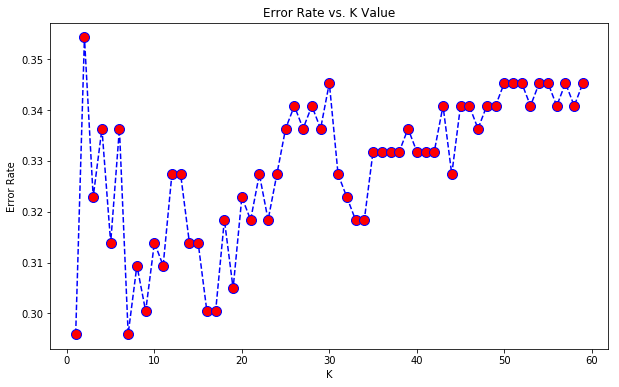

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Output prediction results

In [124]:
# prediction = pd.DataFrame(rfc_pred, columns=['rfc_pred']).to_csv('prediction.csv')

prediction = pd.DataFrame(grid_rfc_pred, columns=['grid_rfc_pred']).to_csv('prediction.csv')

In [114]:
# result = X_test.append(prediction)

In [348]:
# result.to_csv('result.csv')